# Homework 3 : Convex Optimization 

**First Name :** Marceau <br>
**Last Name :** Pailhas

## Q1

See attached pdf

## Q2 

In [20]:
###IMPORTING###
import numpy as np
import matplotlib.pyplot as plt 

In [21]:
def F(v,t,Q,A,b,p):
    phi = -np.sum( np.log(-A@v +b) )
    return t*(np.array(v).T@Q@v + p.T @ v ) +phi

In [22]:
def  centering_step(Q,p,A,b,t,v0,eps):
    
    v_var = v0
    m = b.shape[0]
    assertion = True
    V=[list(v_var)]
    
    while(assertion):
        #computes the hessian of  x --> t f0(x) + phi(x)
        f = (A @ v_var) - b
        hessian_phi = np.zeros((n,n))
        grad_phi = np.zeros(n)
        
        for i in range(m):
            f_i = f[i]
            grad_f_i = A.T [:,i] #select ith column of the matrix tA
            
            grad_phi += (-1/f_i)*grad_f_i
            hessian_phi += np.outer(grad_f_i,grad_f_i)*(1/f_i**2)

        gradient = t*(Q + Q.T)@ v_var + t*p + grad_phi
        hessian = t*(Q + Q.T) + hessian_phi
        
        inv_hessian = np.linalg.inv(hessian)
        Delta_v = -inv_hessian @  gradient
        
        lamda2 = np.dot(-Delta_v, gradient )
        assertion = (lamda2/2) > eps
        
        
        
        s=1
        beta = 1/4
        alpha =1/8
        assertion2 = True
        
        while assertion2:
            
            if np.sum( A@(v_var+s*Delta_v) < b ) == b.shape[0]:
                assertion2 = (F(v_var+s*Delta_v,t,Q,A,b,p) >=  F(v_var,t,Q,A,b,p)  + alpha*s*gradient.T@Delta_v)
            s = beta*s
            #print("s=",s)
        v_var = v_var + s*Delta_v #here the step has to follow the backtracking condition
        
        V.append(list(np.copy(v_var))) #we append vi to create the sequence (vj) with j =1,...,n_eps  
    #print("length of the v list = ",len(V))    
    return V

In [23]:
def barr_method(Q,p,A,b,v0,eps,mu):
    assertion = True
    m = b.shape[0]
    v = v0
    
    #parameters that must be tweaked by the user
    t=0.5
    
    V = [list(v)]
    i=0
    
    while(assertion):
        i+=1
        
         #centering step
        V.append(list(centering_step(Q,p,A,b,t,v,eps))) #we keep w_t
        
        v = V [-1][-1]
        #print("v =",v)
        t = mu*t
        assertion =  m/t > eps
        #print("number iteration", i) 
        
    return V

## Q3 

### CODE TEST

In [24]:
####PARAMETERS###
lambdaa = 10
n = 10
d = 20

In [25]:
##Generating random inputs
X=np.random.normal(0,1,(n,d))
x=np.random.normal(0,0.1,d)
y = X @x + 0.5*np.random.normal(0,1,n)

In [26]:
Q = (1/2)* np.eye(n)
p = -y
A = np.concatenate((X.T,-X.T), axis = 0)
b = lambdaa*np.array([1]*2*d)

In [27]:
V = barr_method(Q,p,A,b,np.array([0]*10),1e-2,15)

In [28]:
## We print y just to see if the code does what we want, at least we can check the vector size and the components magnitude
y

array([ 0.65779466, -1.04491366, -1.4232036 ,  0.71251739,  0.62721139,
       -0.64371096, -0.60420098, -0.94449004,  0.76209796,  0.24155877])

In [29]:
def Display_prep(V):
    "This function takes all the vectors v obtained at each step of the newton's algorithm. It returns the list of computed values of v.T@Q@v + p.T@v for each iteration of the barier algorithm. "
    U = []
    for i in range(len(V)):
    
        if type(V[i][-1])!=list :
            U.append(list(V[i])) 
        
        else:
        #print(list(V[i][-1])*len(V[i]))
            U = U +[list(V[i][-1])]*len(V[i])
    
    newU = list(map(lambda v: np.array(v).T@Q@np.array(v)+ p.T@np.array(v), U ))
    min_nU = min(newU)
    newU = list(map(lambda u : u - min_nU, newU))
    
    return newU

In [30]:
#Checking if it works properly
newU = Display_prep(V)

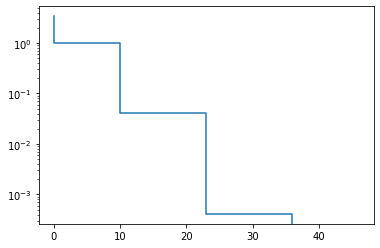

In [31]:
plt.yscale("log")
plt.plot(range(len(newU)),newU,drawstyle= "steps-pre" )

We see a steps-like curve. The algorithm converges quite fast.

We will display all curvees for $\mu = 2, 15, 50 , 100 $

In [32]:
# mu = 2
V2 = barr_method(Q,p,A,b,np.array([0]*10),1e-2,2)
U2 = Display_prep(V2)

# mu = 15
V15 = barr_method(Q,p,A,b,np.array([0]*10),1e-2,15)
U15 = Display_prep(V15)

# mu = 50
V50 = barr_method(Q,p,A,b,np.array([0]*10),1e-2,50)
U50 = Display_prep(V50)

# mu = 100
V100 = barr_method(Q,p,A,b,np.array([0]*10),1e-2,100)
U100 = Display_prep(V100)

In [33]:
def completion(U2,U15,U50,U100):
    "This algo completes the list with 0 such that they are all the same length."
    len_max = max(len(U2),len(U15),len(U50),len(U100))
    
    U2 = U2 + [0]*(len_max - len(U2))
    U15 = U15 + [0]*(len_max - len(U15))
    U50 = U50 + [0]*(len_max - len(U50))
    U100 = U100 + [0]*(len_max - len(U100))
    
    return U2,U15,U50,U100

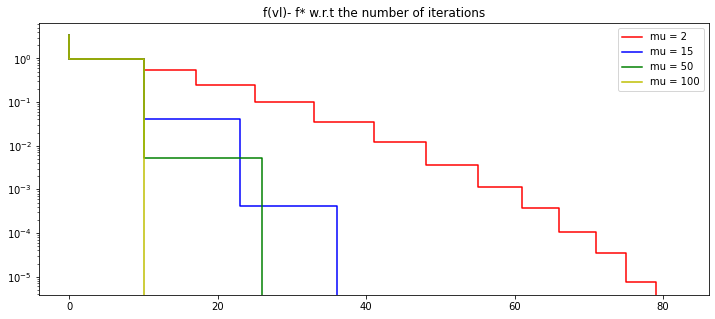

In [34]:
U2,U15,U50,U100 = completion(U2,U15,U50,U100)

fig = plt.figure(1, figsize=(12, 5))
plt.yscale("log")
plt.plot(range(len(U2)), U2, drawstyle= "steps-pre" , color ='r', label = 'mu = 2')
plt.plot(range(len(U2)), U15, drawstyle= "steps-pre" , color= 'b', label = 'mu = 15')
plt.plot(range(len(U2)), U50, drawstyle= "steps-pre" ,color='g', label = 'mu = 50')
plt.plot(range(len(U2)), U100, drawstyle= "steps-pre",color='y'  , label = 'mu = 100')
plt.legend()

plt.title('f(vl)- f* w.r.t the number of iterations')
plt.show()

The best $\mu$ to choose is 100, it converges the fastest. 

### Evaluating w from the different values of v* obtained  

We will now check what w is for different value of $\mu$. We have that $X w = y + v^*$ with Slater's conditions. We will use the pseudo inverse to recover w.

In [35]:
p_inv_X = np.linalg.pinv(X)

#for mu =2

v2_star = np.array(V2[-1][-1])
w2 = p_inv_X@(y+v2_star)

#for mu =15
v15_star = np.array(V15[-1][-1])
w15 = p_inv_X@(y+v15_star)

#for mu =50
v50_star = np.array(V50[-1][-1])
w50 = p_inv_X@(y+v50_star)

#for mu =100
v100_star = np.array(V100[-1][-1])
w100 = p_inv_X@(y+v100_star)

We will check the distance between the w thus obained.

In [36]:
print("w2=",w2)
print("\n \n w15=",w15)
print("\n \n w50=",w50)
print("\n \n w100=",w100)

w2= [ 0.42102317 -0.34268727 -0.19591755 -0.20768758  0.31443717 -0.38173282
  0.11548427  0.10268196  0.32936609  0.30433764 -0.08688182  0.21518907
 -0.3388803  -0.30882102  0.36267478 -0.63362663  0.23688951  0.68616352
 -0.0013462   0.53820162]

 
 w15= [ 0.42101471 -0.34268112 -0.19591274 -0.20768304  0.31443307 -0.38172654
  0.1154784   0.10268165  0.32936342  0.30433128 -0.08687756  0.21518363
 -0.33887553 -0.30881923  0.36267073 -0.63361831  0.23688611  0.68615965
 -0.00134262  0.53819637]

 
 w50= [ 0.4209852  -0.34263732 -0.19588395 -0.20767729  0.31440824 -0.38169302
  0.11544957  0.10268225  0.32929238  0.30429153 -0.08684358  0.21513666
 -0.33884071 -0.30880689  0.36267254 -0.63358155  0.23688799  0.68615149
 -0.00133075  0.53817204]

 
 w100= [ 4.19313052e-01 -3.39905127e-01 -1.94126651e-01 -2.07505073e-01
  3.12896616e-01 -3.79664086e-01  1.13695462e-01  1.02757511e-01
  3.24596480e-01  3.01831445e-01 -8.46640881e-02  2.12129245e-01
 -3.36682643e-01 -3.08113936e-01  3.63

In [37]:
print("The L2 distance between w2* and w15* is : ",np.linalg.norm(w2-w15), "\n \n The L2 distance between w15* and w50* :" ,np.linalg.norm(w15-w50),"\n \n The L2 distance between w50* and w100* :" , np.linalg.norm(w100-w50) , "\n \n The L2 distance between w100* and w2* :" , np.linalg.norm(w100-w2) ) 

The L2 distance between w2* and w15* is :  2.2752165564050806e-05 
 
 The L2 distance between w15* and w50* : 0.00014046701093053019 
 
 The L2 distance between w50* and w100* : 0.008767928001632353 
 
 The L2 distance between w100* and w2* : 0.00892631806021657


We see that we loose in precision as we increase $\mu$.

In [38]:
#saving in html format 
! jupyter nbconvert --to html Homework3.ipynb

[NbConvertApp] Converting notebook Homework3.ipynb to html
[NbConvertApp] Writing 650991 bytes to Homework3.html
